# Customer Segmentation for Retail

👉 [View this project on GitHub](https://github.com/your-username/customer-segmentation-retail)

📘 [View this Notebook File on GitHub](https://github.com/your-username/customer-segmentation-retail/blob/main/customer_segmentation.ipynb)



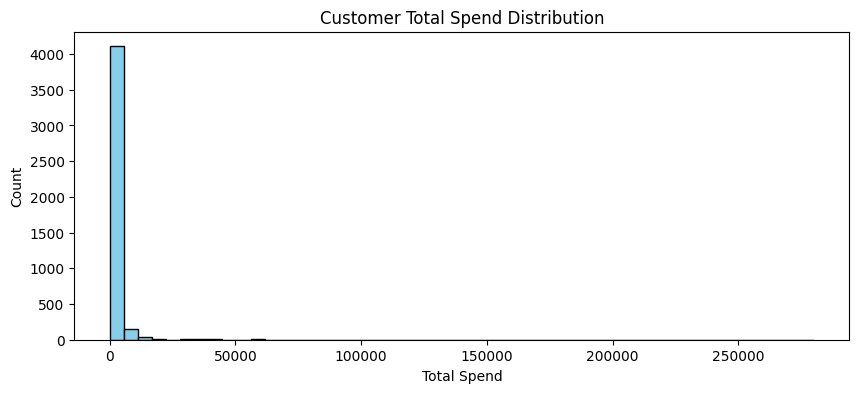

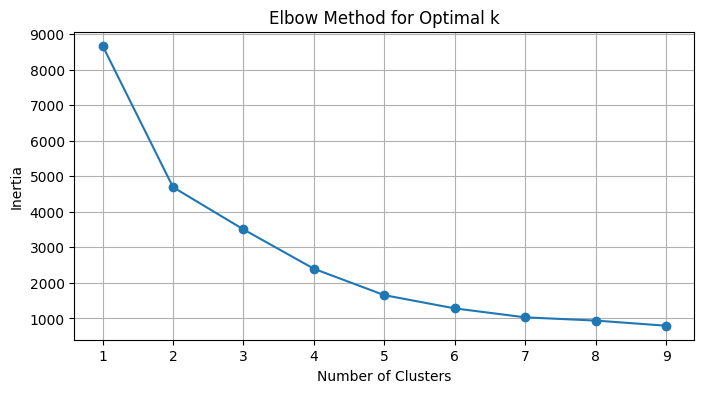

Cluster Summary:
          Frequency       Monetary  NumCustomers
Cluster                                         
0          3.284893    1202.299072          4177
1        178.000000   72845.453333             3
2         42.833333  190863.461667             6
3         26.447368   16616.365461           152


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv(r"C:\Users\adity\OneDrive\Documents\powerbi\online_retail.csv", encoding='ISO-8859-1')


# Data Cleaning
df.dropna(subset=["CustomerID"], inplace=True)
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]

# Feature Engineering: Total Spend
df["TotalSpend"] = df["Quantity"] * df["UnitPrice"]

# Group by CustomerID to get RFM-like features
customer_df = df.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",      # Frequency
    "TotalSpend": "sum"          # Monetary
}).reset_index()

# Rename columns
customer_df.columns = ["CustomerID", "Frequency", "Monetary"]

# EDA: Visualize distribution
plt.figure(figsize=(10, 4))
plt.hist(customer_df["Monetary"], bins=50, color="skyblue", edgecolor="black")
plt.title("Customer Total Spend Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Count")
plt.show()

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df[["Frequency", "Monetary"]])

# Elbow Method to find optimal clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Fit KMeans with optimal k (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=0)
customer_df["Cluster"] = kmeans.fit_predict(X_scaled)

# Cluster Summary
summary = customer_df.groupby("Cluster").agg({
    "Frequency": "mean",
    "Monetary": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "NumCustomers"})

print("Cluster Summary:")
print(summary)

# Optional: Save results to CSV
customer_df.to_csv("clustered_customers.csv", index=False)

